<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Regresssion with scikit-learn<br><br> using Soccer Dataset

<br><br></p>


We will again be using the open dataset from the popular site <a href="https://www.kaggle.com">Kaggle</a> that we used in Week 1 for our example. 

Recall that this <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. 

**Note:** Please download the file *database.sqlite* if you don't yet have it in your *Week-7-MachineLearning* folder.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Import Libraries<br><br></p>


In [24]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Read Data from the Database into pandas
<br><br></p>


In [3]:
# Create your connection.
cnx = sqlite3.connect('data-temp/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)


In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.shape

(183978, 42)

In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Declare the Columns You Want to Use as Features
<br><br></p>


In [10]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>


In [7]:
target = ['overall_rating']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Clean the Data<br><br></p>


In [8]:
df = df.dropna()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extract Features and Target ('overall_rating') Values into Separate Dataframes
<br><br></p>


In [11]:
X = df[features]

In [12]:
y = df[target]

Let us look at a typical row from our features: 

In [13]:
X.iloc[2]

potential             66.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            63.0
interceptions         41.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       66.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 2, dtype: float64

Let us also display our target values: 

In [14]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Split the Dataset into Training and Test Datasets
<br><br></p>


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(1) Linear Regression: Fit a model to the training set
<br><br></p>


In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [17]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[ 66.51284879],
       [ 79.77234615],
       [ 66.57371825],
       ..., 
       [ 69.23780133],
       [ 64.58351696],
       [ 73.6881185 ]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [18]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [19]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [20]:
print(RMSE)

2.805303046855211


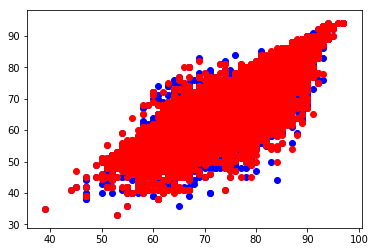

In [35]:
plt.scatter(X_test['potential'], y_test, c="b")
plt.scatter(X_test['potential'], y_prediction, c="r")

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(2) Decision Tree Regressor: Fit a new regression model to the training set
<br><br></p>


In [29]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Decision Tree Regressor
<br><br></p>


In [30]:
y_prediction = regressor.predict(X_test)
y_prediction

array([ 63.        ,  84.        ,  62.38666667, ...,  71.        ,
        62.        ,  73.        ])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

For comparision: What is the mean of the expected target value in test set ?
<br><br></p>


In [31]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

<br><br></p>


In [32]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [33]:
print(RMSE)

1.4639762237669596


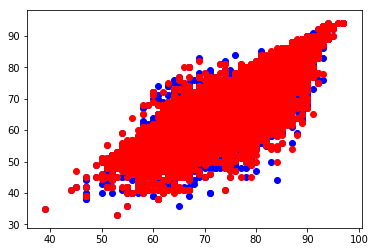

In [37]:
plt.scatter(X_test['potential'], y_test, c="b")
plt.scatter(X_test['potential'], y_prediction, c="r")